In [41]:
from utils import jacobi
import numpy as np
import matplotlib.pyplot as plt

import itertools

import numpy as np
import pandas as pd
from decimal import *

from operator import itemgetter
from decimal import Decimal

## Problem 2 FCI diagonalization

### First let us define the hamiltonian

\begin{equation*}
H=
 \begin{bmatrix}
2-g & -g/2 & -g/2 & -g/2 & -g/2 & 0 \\
-g/2 & 4-g & -g/2 & -g/2 & 0 & -g/2 \\
-g/2 & -g/2 & 6-g & 0 & -g/2 & -g/2 \\
-g/2 & -g/2 & 0 & 6-g & -g/2 & -g/2 \\
-g/2 & 0 & -g/2 & -g/2 & 8-g & -g/2 \\
0 & -g/2 & -g/2 & -g/2 & -g/2 & 10-g 
\end{bmatrix}  
\end{equation*}

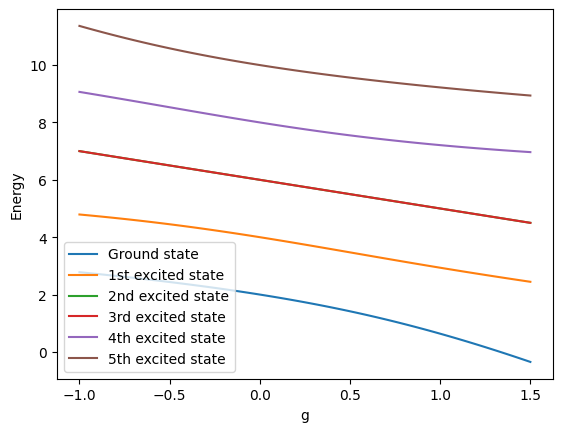

In [42]:
# braket structures <kl|H|mm>
#diagonal elements in order 
# <12|H|12> <13|H|13> <14|H|14> <23|H|23> <24|H|24> <34|H|34>

# fill in the diagonals
fci_gs_energy = []
fci_e1_energy = []
fci_e2_energy = []
fci_e3_energy = []
fci_e4_energy = []
fci_e5_energy = []

g_list = np.linspace(-1.0, 1.5, 100)
for g in g_list:
    H = np.zeros((6,6))

    H[0,0] = 2-g 
    H[1,1] = 4-g
    H[2,2] = 6-g
    H[3,3] = 6-g
    H[4,4] = 8-g
    H[5,5] = 10-g

    #fill in the off diagonals
    for i in range(6):
        for j in range(i):
            # if not the second diagonal
            if i + j != 5:
                H[i,j] = -g/2
                H[j,i] = -g/2

    # diagonalise the matrix
    eigvals, _ = jacobi(H)
    eigvals = np.sort(eigvals.diagonal())

    # save the energy of the states in a list 
    fci_gs_energy.append(eigvals[0])
    fci_e1_energy.append(eigvals[1])
    fci_e2_energy.append(eigvals[2])
    fci_e3_energy.append(eigvals[3])
    fci_e4_energy.append(eigvals[4])
    fci_e5_energy.append(eigvals[5])

# plot the energies and g
plt.plot(g_list, fci_gs_energy, label='Ground state')
plt.plot(g_list, fci_e1_energy, label='1st excited state')
plt.plot(g_list, fci_e2_energy, label='2nd excited state')
plt.plot(g_list, fci_e3_energy, label='3rd excited state')
plt.plot(g_list, fci_e4_energy, label='4th excited state')
plt.plot(g_list, fci_e5_energy, label='5th excited state')
plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()

plt.savefig('energies_fci.pdf')
plt.show()

## Problem 3

\begin{equation*}H'=
 \begin{bmatrix}
2-g & -g/2 & -g/2 & -g/2 & -g/2 \\
-g/2 & 4-g & -g/2 & -g/2 & 0 \\
-g/2 & -g/2 & 6-g & 0 & -g/2 \\
-g/2 & -g/2 & 0 & 6-g & -g/2 \\
-g/2 & 0 & -g/2 & -g/2 & 8-g \\
\end{bmatrix}  
\end{equation*}

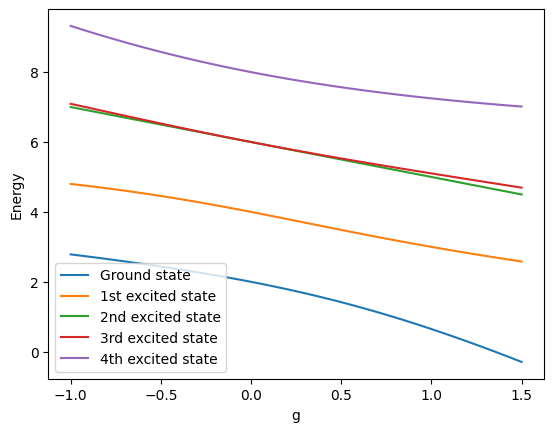

In [43]:
aprox_gs_energy = []
aprox_e1_energy = []
aprox_e2_energy = []
aprox_e3_energy = []
aprox_e4_energy = []

g_list = np.linspace(-1.0, 1.5, 100)
for g in g_list:
    H = np.zeros((5,5))

    H[0,0] = 2-g 
    H[1,1] = 4-g
    H[2,2] = 6-g
    H[3,3] = 6-g
    H[4,4] = 8-g

    #fill in the off diagonals
    for i in range(5):
        for j in range(i):
            # if not the second diagonal
            if i + j != 5:
                H[i,j] = -g/2
                H[j,i] = -g/2

    # diagonalise the matrix
    eigvals, _ = jacobi(H)

    eigvals = np.sort(eigvals.diagonal())

    # save the energy of the states in a list 
    aprox_gs_energy.append(eigvals[0])
    aprox_e1_energy.append(eigvals[1])
    aprox_e2_energy.append(eigvals[2])
    aprox_e3_energy.append(eigvals[3])
    aprox_e4_energy.append(eigvals[4])


# plot the energies and g
plt.plot(g_list, aprox_gs_energy, label='Ground state')
plt.plot(g_list, aprox_e1_energy, label='1st excited state')
plt.plot(g_list, aprox_e2_energy, label='2nd excited state')
plt.plot(g_list, aprox_e3_energy, label='3rd excited state')
plt.plot(g_list, aprox_e4_energy, label='4th excited state')
plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()

#plt.savefig('energies_approx.pdf')
plt.show()

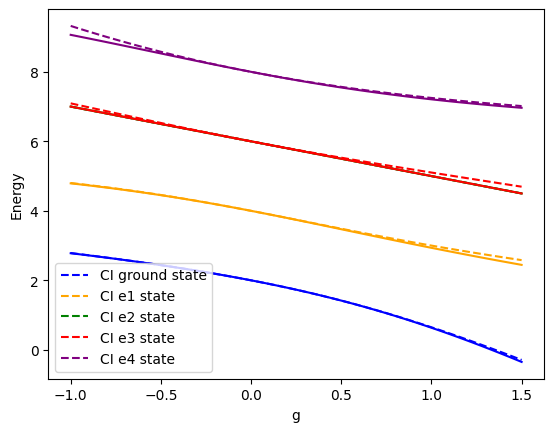

In [44]:
# plot the energies and g
plt.plot(g_list, aprox_gs_energy, label='CI ground state', linestyle='dashed', color='blue')
plt.plot(g_list, fci_gs_energy, color='blue')

plt.plot(g_list, aprox_e1_energy, label='CI e1 state', linestyle='dashed', color='orange')
plt.plot(g_list, fci_e1_energy,  color='orange')

plt.plot(g_list, aprox_e2_energy, label='CI e2 state', linestyle='dashed', color='green')
plt.plot(g_list, fci_e2_energy, color='green')

plt.plot(g_list, aprox_e3_energy, label='CI e3 state', linestyle='dashed', color='red')
plt.plot(g_list, fci_e3_energy,  color='red')


plt.plot(g_list, aprox_e4_energy, label='CI e4 state', linestyle='dashed', color='purple')
plt.plot(g_list, fci_e4_energy,  color='purple')



plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()

plt.savefig('energies_fci_aprox.pdf')

### Problem 5 (Hartree Fock)

In [45]:
def get_integrals(g):
    integrals_dict = {}
    # example 
    # key = '1234', value = 0
    # key = '1134', value = -g/2
    for i in range(1,5):
        for j in range(1,5):
            for k in range(1,5):
                for l in range(1,5):
                    if i != j or k != l:
                        integrals_dict[str(i)+str(j)+str(k)+str(l)] = 0
                    else:
                        integrals_dict[str(i)+str(j)+str(k)+str(l)] = -g/2

    return integrals_dict

In [46]:
def h0_term(alpha, beta):
    if not alpha == beta:
        return 0

    p = int(alpha[0])
 
    return (p-1)


def v_term(alpha, beta, gamma, delta, integrals, antisym = True):

    alpha_n, alpha_spin = alpha[0], alpha[-1]
    beta_n, beta_spin = beta[0], beta[-1]
    gamma_n, gamma_spin = gamma[0], gamma[-1]
    delta_n, delta_spin = delta[0], delta[-1]

    direct_term = integrals[alpha_n+beta_n+gamma_n+delta_n]
    exchange_term = integrals[alpha_n+beta_n+delta_n+gamma_n]

    if alpha_spin != gamma_spin or beta_spin != delta_spin:
        direct_term = 0

    if alpha_spin != delta_spin or beta_spin != gamma_spin:
        exchange_term = 0

    if not antisym:
        return direct_term

    return direct_term - exchange_term

In [47]:
hole_states = ['1+', '1-', '2+', '2-']
particle_states = ['3+', '3-', '4+', '4-']

spOrbitals = hole_states + particle_states

Nparticles = 4

In [48]:
def set_up_density_matrix(Nparticles, spOrbitals):
    n_spOrbitals = len(spOrbitals)
    C = np.eye(n_spOrbitals) # HF coefficients
    DensityMatrix = np.zeros([n_spOrbitals,n_spOrbitals])
    for gamma in range(n_spOrbitals):
        for delta in range(n_spOrbitals):
            sum = 0.0
            for i in range(Nparticles):
                sum += C[gamma][i]*C[delta][i]
                DensityMatrix[gamma][delta] = Decimal(sum)

    return DensityMatrix

def hartee_fock(Nparticles, spOrbitals, integrals , maxHFiter= 100, epsilon = 1.0e-10, silent=False):
    DensityMatrix = set_up_density_matrix(Nparticles, spOrbitals)
    difference = 1.0
    hf_count = 0
    n_spOrbitals = len(spOrbitals)

    oldenergies = np.zeros(n_spOrbitals)
    newenergies = np.zeros(n_spOrbitals)

    while hf_count < maxHFiter and difference > epsilon:
        HFmatrix = np.zeros([n_spOrbitals, n_spOrbitals]) # reset the HF matrix		
        for alpha_index, alpha in enumerate(spOrbitals):
            for beta_index, beta in enumerate(spOrbitals):
                sumFockTerm = 0.0 ##Setting up the Fock matrix
                for gamma_index, gamma in enumerate(spOrbitals):
                    for delta_index, delta in enumerate(spOrbitals):
                        sumFockTerm += DensityMatrix[gamma_index][delta_index]*v_term(alpha, gamma, beta, delta, integrals)
                        HFmatrix[alpha_index][beta_index] = Decimal(sumFockTerm)

                        if beta_index == alpha_index:   ### Adding the one-body term
                            HFmatrix[alpha_index][alpha_index] += h0_term(alpha, beta)
        
        #print(matrix_parser(HFmatrix, len(HFmatrix[0])))

        spenergies, C = np.linalg.eigh(HFmatrix)

        DensityMatrix = np.zeros([n_spOrbitals, n_spOrbitals]) ## Setting up new density matrix
        for gamma in range(n_spOrbitals):
            for delta in range(n_spOrbitals):
                sum = 0.0
                for i in range(Nparticles):
                    sum += C[gamma][i]*C[delta][i]
                DensityMatrix[gamma][delta] = Decimal(sum)
        newenergies = spenergies
        sum =0.0 
        for i in range(n_spOrbitals): ## difference between previous and new sp HF energies
            sum += (abs(newenergies[i]-oldenergies[i]))/n_spOrbitals
        difference = sum
        oldenergies = newenergies
        hf_count += 1

        if not silent:
            print(f"############### Iteration {hf_count} ###############")
            print("Single-particle energies")
            for i in range(n_spOrbitals):
                print('{0:4d}  {1:.4f}'.format(i, Decimal(oldenergies[i])))
        
    return DensityMatrix

In [49]:
def finding_E(Nparticles, spOrbitals, integrals, maxHFiter= 100):
    DensityMatrix = hartee_fock(Nparticles, spOrbitals, integrals, maxHFiter, silent=True)
    n_spOrbitals = len(spOrbitals)

    E = 0.0
    for alpha_index, alpha in enumerate(spOrbitals):
        for beta_index, beta in enumerate(spOrbitals):
            E += DensityMatrix[alpha_index][beta_index]*h0_term(alpha, beta)
            for gamma_index, gamma in enumerate(spOrbitals):
                for delta_index, delta in enumerate(spOrbitals):
                    E += (1/2)*DensityMatrix[alpha_index][beta_index]*DensityMatrix[gamma_index][delta_index]*v_term(alpha, gamma, beta, delta, integrals)
    #print(f"Energy: {E}")
    return E

In [50]:
g_list = np.linspace(-1.0, 1.5, 100)
aprox_hf_energy = []
for g in g_list:
    integrals = get_integrals(g)
    aprox_hf_energy.append(finding_E(Nparticles, spOrbitals, integrals, maxHFiter= 100))

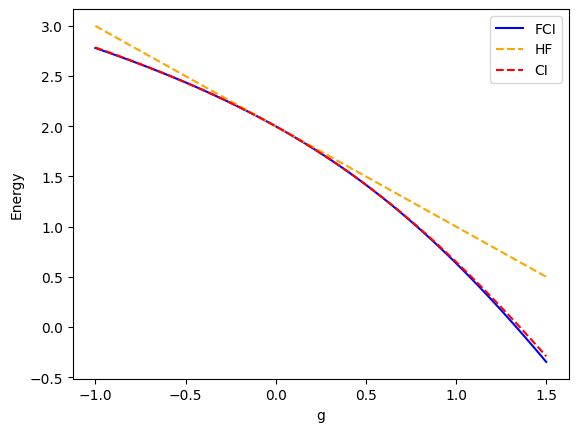

In [51]:
plt.plot(g_list, fci_gs_energy, label='FCI', color='blue')
plt.plot(g_list, aprox_hf_energy, label='HF', linestyle='dashed', color='orange')
plt.plot(g_list, aprox_gs_energy, label='CI', linestyle='dashed', color='red')

plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()
plt.savefig('HF_approx_vs_FCI.pdf')
plt.show()

# RS MBPT

### Problem 6: RS MBPT to 2nd order by looking at diagrams

In [52]:
hole_states = ['1+', '1-', '2+', '2-']
particle_states = ['3+', '3-', '4+', '4-']
fermi_level = 2
Nparticles = 4

In [53]:
def below_fermi(fermi_level):
    n = [str(n) for n in range(1, fermi_level + 1)] 
    spin = ["+", "-"] 
    return  list(itertools.product(n, spin))

def above_fermi(fermi_level, limit):
    n = [str(n) for n in range(fermi_level+1, limit+1)] 
    spin = ["+", "-"] 
    return  list(itertools.product(n, spin))

In [54]:
def div_e(particles, holes): #divisor energies
    hole_energies = 0 
    particle_energies = 0

    for hole in holes:
        p = int(hole[0])
        hole_energies += (p-1)

    for particle in particles:
        p = int(particle[0])
        particle_energies += (p-1)
    return particle_energies - hole_energies

In [55]:
holes = below_fermi(fermi_level)
particles = above_fermi(fermi_level, 4)

def scnd_order_energy_correction(particles, holes, integrals):
    E_2nd = 0
    for a in particles:
        for b in particles:
            for i in holes:
                for j in holes:
                    num =  v_term(a, b, i, j, integrals)*v_term(a, b, j, i, integrals)
                    den = 4*div_e([a, b], [i, j])
                    E_2nd += num/den
    return E_2nd

In [56]:
g_list = np.linspace(-1.0, 1.5, 100)
aprox_scnd_order_energy = []

for g in g_list:
    integrals = get_integrals(g)
    aprox_scnd_order_energy.append(2 - g + scnd_order_energy_correction(particles, holes, integrals))

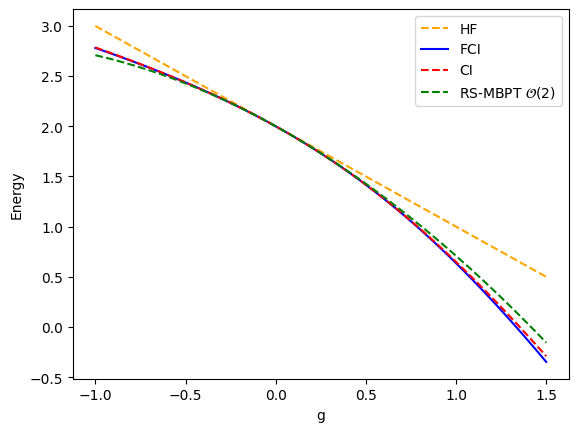

In [57]:
plt.plot(g_list, aprox_hf_energy, label='HF', linestyle='dashed', color='orange')
plt.plot(g_list, fci_gs_energy, label='FCI', color='blue')
plt.plot(g_list, aprox_gs_energy, label='CI', linestyle='dashed', color='red')
plt.plot(g_list, aprox_scnd_order_energy, label='RS-MBPT $\mathcal{O}(2)$', linestyle='dashed', color='green')

plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()
plt.savefig('scn_HF_approx_vs_FCI.pdf')
plt.show()

## RS mbpt to 4th order

##### V_{ij} = will represent the possible transitions and it is actually the same as the interaction part of the matrix we used in the previous section

In [58]:
def V(i,j, g):
    # i and j go from 0 to 5 as those are all the possible configurations
    # 0 is the ground state, 1 is the first excited state, etc.
    # convert levels i, j to our usual alpha beta gamma delta notation
    ## i = 0 j = 0 corresponds to <phi_0|V|phi_0> = <1+1-|V|1+1> = -g/2
    if i == j:
        return -g
    elif i + j == 5: # secondary diagonal
        return 0
    else:
        return -g/2

def D0(i):
    # this is done in a dumb way but it is didatic
    if i == 1:
        E_i = 2*(3-1) + 2*(1-1)
    if i == 2:
        E_i = 2*(4-1) + 2*(1-1)
    if i == 3:
        E_i = 2*(3-1) + 2*(2-1)
    if i == 4:
        E_i = 2*(4-1) + 2*(2-1)
    if i == 5:
        E_i = 2*(4-1) + 2*(3-1)

    return 2 - E_i

def W(i,j, g):
    if i == j:
        return V(i,j,g) - V(0,0, g)
    return V(i,j,g)

In [59]:
def rsmbpt_E(order, g):

    if order == 1:
        E_fst_order = 0
        E_fst_order += V(0,0, g)
        return E_fst_order

    if order == 2:
        E_scnd_order = 0
        for i in range(1, 5):
            E_scnd_order += V(0,i, g)*V(i, 0, g)/D0(i)
        return E_scnd_order 
#
    if order == 3:
        E_trd_order = 0
        for i in range(1, 5):
            for j in range(1, 5):
                E_trd_order += V(0,i, g)*W(i,j, g)*V(j,0, g)/(D0(i)*D0(j))
        return E_trd_order
#
    if order == 4:
        E_fth_order = 0
        for i in range(1, 5):
            for j in range(1, 5):
                for k in range(1, 5):
                    E_fth_order += V(0,i, g)*W(i,j, g)*W(j,k, g)*V(k,0, g)/(D0(i)*D0(j)*D0(k))

        return E_fth_order

In [60]:
g_list = np.linspace(-1.0, 1.5, 100)
aprox_mbpt_scnd_order_energy = []
aprox_mbpt_trd_order_energy = []
aprox_mbpt_fth_order_energy = []
for g in g_list:
    aprox_mbpt_scnd_order_energy.append(2 - g + rsmbpt_E(2, g))
    aprox_mbpt_trd_order_energy.append(2 - g + rsmbpt_E(2, g) + rsmbpt_E(3, g))
    aprox_mbpt_fth_order_energy.append(2 - g + rsmbpt_E(2, g) + rsmbpt_E(3, g) + rsmbpt_E(4, g))

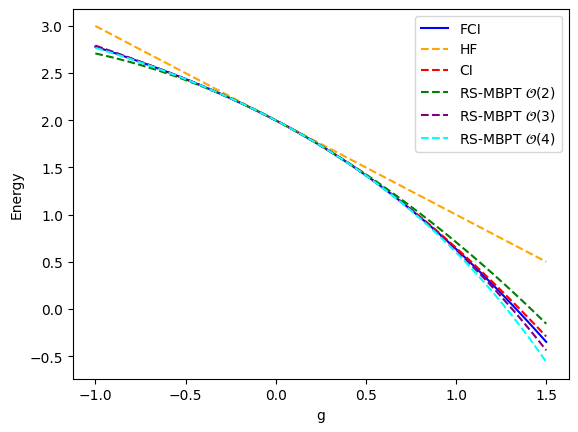

In [61]:
plt.plot(g_list, fci_gs_energy, label='FCI', color='blue')
plt.plot(g_list, aprox_hf_energy, label='HF', linestyle='dashed', color='orange')
plt.plot(g_list, aprox_gs_energy, label='CI', linestyle='dashed', color='red')
plt.plot(g_list, aprox_mbpt_scnd_order_energy, label='RS-MBPT $\mathcal{O}(2)$', linestyle='dashed', color='green')
plt.plot(g_list, aprox_mbpt_trd_order_energy, label='RS-MBPT $\mathcal{O}(3)$', linestyle='dashed', color='purple')
plt.plot(g_list, aprox_mbpt_fth_order_energy, label='RS-MBPT $\mathcal{O}(4)$', linestyle='dashed', color='cyan')

plt.xlabel('g')
plt.ylabel('Energy')
plt.legend()
plt.savefig('mbpt_fth_HF_approx_vs_FCI.pdf')
plt.show()

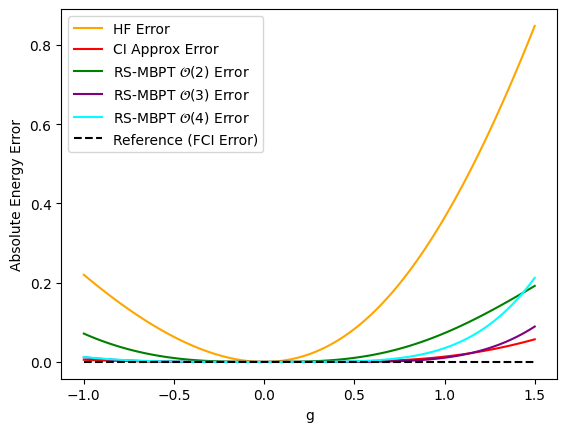

In [62]:
# Plot the errors of each approximation
plt.plot(g_list, np.abs(np.array(aprox_hf_energy) - np.array(fci_gs_energy)), label='HF Error', color='orange')
plt.plot(g_list, np.abs(np.array(aprox_gs_energy) - np.array(fci_gs_energy)), label='CI Approx Error', color='red')
plt.plot(g_list, np.abs(np.array(aprox_mbpt_scnd_order_energy) - np.array(fci_gs_energy)), label='RS-MBPT $\mathcal{O}(2)$ Error', color='green')
plt.plot(g_list, np.abs(np.array(aprox_mbpt_trd_order_energy) - np.array(fci_gs_energy)), label='RS-MBPT $\mathcal{O}(3)$ Error', color='purple')
plt.plot(g_list, np.abs(np.array(aprox_mbpt_fth_order_energy) - np.array(fci_gs_energy)), label='RS-MBPT $\mathcal{O}(4)$ Error', color='cyan')
plt.plot(g_list, np.abs(np.array(fci_gs_energy) - np.array(fci_gs_energy)), label='Reference (FCI Error)', linestyle='dashed', color='black')

plt.xlabel('g')
plt.ylabel('Absolute Energy Error')
plt.legend()

plt.savefig('mbpt_fth_HF_approx_vs_FCI_error.pdf')

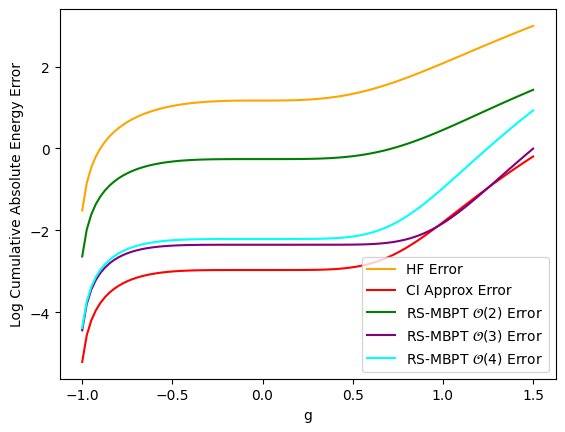

In [64]:
# plot the cumulative error/ integral of the above graph of each approximation
plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(aprox_hf_energy) - np.array(fci_gs_energy)))), label='HF Error', color='orange')
plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(aprox_gs_energy) - np.array(fci_gs_energy)))), label='CI Approx Error', color='red')
plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(aprox_mbpt_scnd_order_energy) - np.array(fci_gs_energy)))), label='RS-MBPT $\mathcal{O}(2)$ Error', color='green')
plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(aprox_mbpt_trd_order_energy) - np.array(fci_gs_energy)))), label='RS-MBPT $\mathcal{O}(3)$ Error', color='purple')
plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(aprox_mbpt_fth_order_energy) - np.array(fci_gs_energy)))), label='RS-MBPT $\mathcal{O}(4)$ Error', color='cyan')
#plt.plot(g_list, np.log(np.cumsum(np.abs(np.array(fci_gs_energy) - np.array(fci_gs_energy)))), label='Reference (FCI Error)', linestyle='dashed', color='black')

plt.xlabel('g')
plt.ylabel('Log Cumulative Absolute Energy Error')
plt.legend()
plt.savefig('error_cumulative.pdf')